In [1]:
# pip3 install torch torchvision --index-url https://download.pytorch.org/whl/cu121
# pip install grad-cam

In [1]:
import cnn_functions
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
import torch
from torchvision import  transforms
from torchvision.models import resnet18, ResNet18_Weights
from torchvision.io import read_image
from torch.utils.data import Dataset, Subset, DataLoader

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


# Binary output

In [2]:
labels_map = {
    0: "REAL",
    1: "FAKE"
}

# Define the dataset object
class BinaryDataset(Dataset):
    def __init__(self, img_dir, transform=None):
        self.transform = transform
        self.img_dir = img_dir
        self.img_labels = []
        self.img_paths = []
        for label, generated in enumerate(["REAL", "FAKE"]):
            image_files = os.listdir(img_dir + "/" + generated)
            for image_name in image_files:
                self.img_labels.append(label)
                self.img_paths.append(os.path.join(generated, image_name))

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_paths[idx])
        image = read_image(img_path)
        label = self.img_labels[idx]
        if self.transform:
            image = self.transform(image)
        return image, label

In [3]:
# Compose the transform to perform on the data
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.ToTensor()
])

# 100k samples for training
train_ds = BinaryDataset(img_dir='./archive/train', transform=transform)

# 10k samples for validation and 10k samples for testing
test_val_ds= BinaryDataset(img_dir='./archive/test', transform=transform)
# Perform a stratified split
idx_train, idx_val = train_test_split(
    range(len(test_val_ds)),
    test_size=0.5,  # 50-50 split
    stratify=test_val_ds.img_labels,
    random_state=0
)
# Define the subsets
test_ds = Subset(test_val_ds, idx_train)
validation_ds = Subset(test_val_ds, idx_val)

# Feature extraction

In [6]:
def binary_feature_extraction(lr):
    # Load the pretrained ResNet18 model
    model = resnet18(weights=ResNet18_Weights.DEFAULT)

    # Freeze all layers in the network
    for param in model.parameters():
        param.requires_grad = False

    # Replace the last fully connected layer with binary output
    model.fc = torch.nn.Linear(512, 2)

    # Load the model into the GPU
    model = model.to(device)
    # Ensure the optimizer only updates the parameters of the last layer
    optimizer = torch.optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=lr)
    
    return model, optimizer



 - binary_feature_extraction_lr001_batch4_epochs30

Epoch 1; Train err = 33.16; Val err = 32.72; Loss: 0.6571
Epoch 2; Train err = 36.89; Val err = 36.51; Loss: 0.6533
Epoch 3; Train err = 32.35; Val err = 32.20; Loss: 0.6585
Epoch 4; Train err = 33.34; Val err = 32.44; Loss: 0.6589
Epoch 5; Train err = 32.16; Val err = 32.04; Loss: 0.6570
Epoch 10; Train err = 30.52; Val err = 30.39; Loss: 0.6561
Epoch 15; Train err = 35.83; Val err = 35.84; Loss: 0.6581
Epoch 20; Train err = 34.94; Val err = 34.91; Loss: 0.6544
Epoch 25; Train err = 32.40; Val err = 31.60; Loss: 0.6576
Epoch 30; Train err = 34.05; Val err = 33.60; Loss: 0.6592


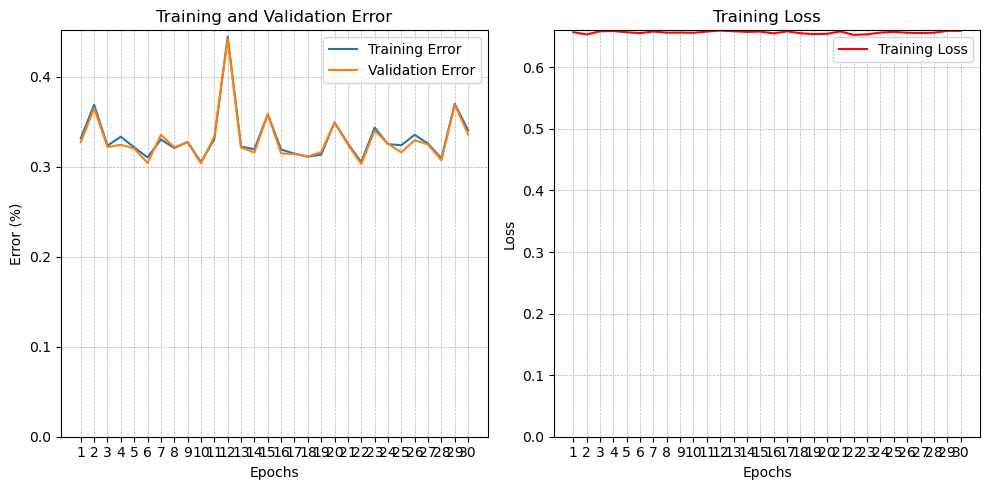



 - binary_feature_extraction_lr001_batch256_epochs30

Epoch 1; Train err = 23.66; Val err = 24.19; Loss: 0.5213
Epoch 2; Train err = 22.81; Val err = 23.18; Loss: 0.4946
Epoch 3; Train err = 22.68; Val err = 22.85; Loss: 0.4904
Epoch 4; Train err = 23.67; Val err = 24.04; Loss: 0.4921
Epoch 5; Train err = 22.97; Val err = 22.96; Loss: 0.4915
Epoch 10; Train err = 22.78; Val err = 23.48; Loss: 0.4910
Epoch 15; Train err = 22.62; Val err = 23.16; Loss: 0.4887
Epoch 20; Train err = 22.92; Val err = 23.10; Loss: 0.4901
Epoch 25; Train err = 23.29; Val err = 23.77; Loss: 0.4901
Epoch 30; Train err = 22.61; Val err = 23.16; Loss: 0.4909


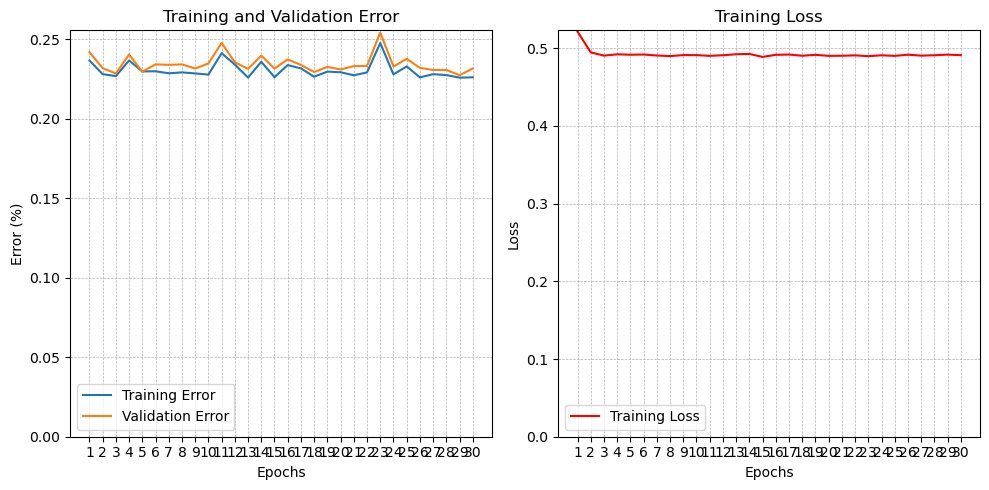



 - binary_feature_extraction_lr001_batch1024_epochs30

Epoch 1; Train err = 25.50; Val err = 25.78; Loss: 0.6132
Epoch 2; Train err = 23.93; Val err = 24.36; Loss: 0.5103
Epoch 3; Train err = 23.18; Val err = 23.88; Loss: 0.4962
Epoch 4; Train err = 23.00; Val err = 23.80; Loss: 0.4917
Epoch 5; Train err = 22.73; Val err = 23.25; Loss: 0.4879
Epoch 10; Train err = 22.60; Val err = 22.92; Loss: 0.4845
Epoch 15; Train err = 22.93; Val err = 23.47; Loss: 0.4839
Epoch 20; Train err = 22.67; Val err = 23.32; Loss: 0.4829
Epoch 25; Train err = 22.55; Val err = 22.87; Loss: 0.4825
Epoch 30; Train err = 22.51; Val err = 22.98; Loss: 0.4839


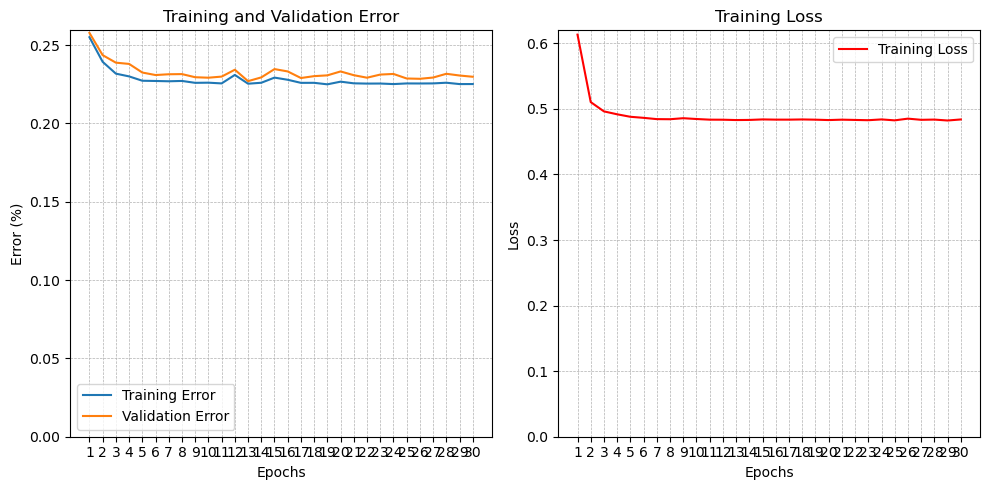



 - binary_feature_extraction_lr0001_batch4_epochs30

Epoch 1; Train err = 29.21; Val err = 29.10; Loss: 0.5886
Epoch 2; Train err = 30.35; Val err = 30.16; Loss: 0.5707
Epoch 3; Train err = 27.27; Val err = 27.25; Loss: 0.5711
Epoch 4; Train err = 28.12; Val err = 28.11; Loss: 0.5716
Epoch 5; Train err = 30.20; Val err = 29.68; Loss: 0.5693
Epoch 10; Train err = 28.40; Val err = 28.13; Loss: 0.5719
Epoch 15; Train err = 29.69; Val err = 29.92; Loss: 0.5714
Epoch 20; Train err = 27.98; Val err = 28.02; Loss: 0.5709
Epoch 25; Train err = 28.74; Val err = 28.18; Loss: 0.5706
Epoch 30; Train err = 28.29; Val err = 27.80; Loss: 0.5723


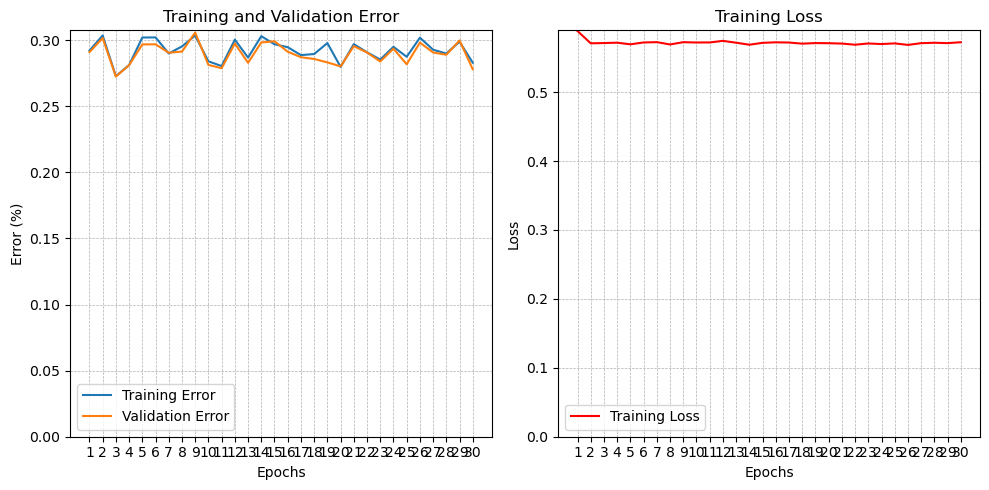



 - binary_feature_extraction_lr0001_batch256_epochs30

Epoch 1; Train err = 27.17; Val err = 27.80; Loss: 0.6218
Epoch 2; Train err = 24.82; Val err = 25.31; Loss: 0.5318
Epoch 3; Train err = 24.10; Val err = 24.44; Loss: 0.5115
Epoch 4; Train err = 23.67; Val err = 24.34; Loss: 0.5029
Epoch 5; Train err = 23.31; Val err = 23.79; Loss: 0.4970
Epoch 10; Train err = 22.69; Val err = 23.37; Loss: 0.4877
Epoch 15; Train err = 22.76; Val err = 23.31; Loss: 0.4842
Epoch 20; Train err = 22.74; Val err = 23.06; Loss: 0.4840
Epoch 25; Train err = 22.50; Val err = 22.92; Loss: 0.4831
Epoch 30; Train err = 22.50; Val err = 23.05; Loss: 0.4827


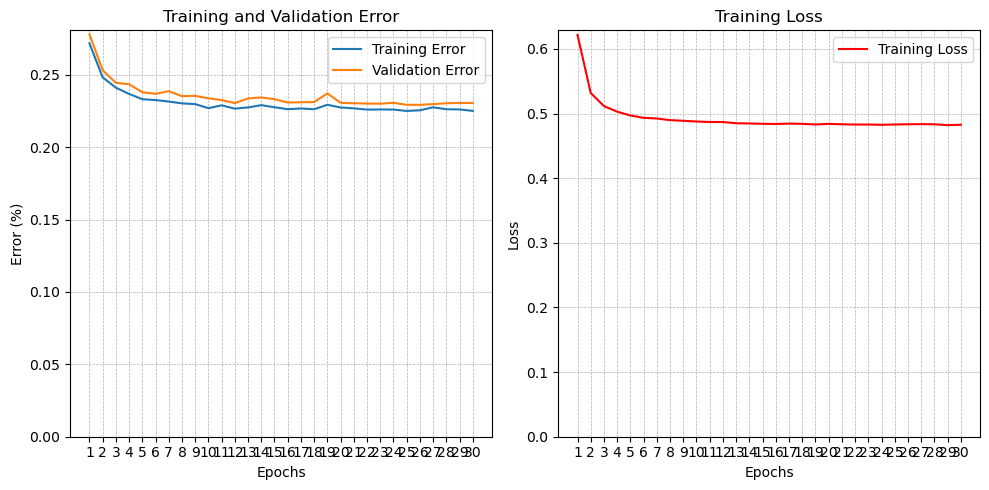



 - binary_feature_extraction_lr0001_batch1024_epochs30

Epoch 1; Train err = 39.16; Val err = 39.33; Loss: 0.7429
Epoch 2; Train err = 31.93; Val err = 32.78; Loss: 0.6424
Epoch 3; Train err = 28.81; Val err = 29.43; Loss: 0.5910
Epoch 4; Train err = 27.07; Val err = 27.58; Loss: 0.5622
Epoch 5; Train err = 25.99; Val err = 26.45; Loss: 0.5435
Epoch 10; Train err = 23.93; Val err = 24.41; Loss: 0.5055
Epoch 15; Train err = 23.37; Val err = 23.81; Loss: 0.4939
Epoch 20; Train err = 22.99; Val err = 23.33; Loss: 0.4883
Epoch 25; Train err = 22.80; Val err = 23.16; Loss: 0.4856
Epoch 30; Train err = 22.69; Val err = 23.00; Loss: 0.4844


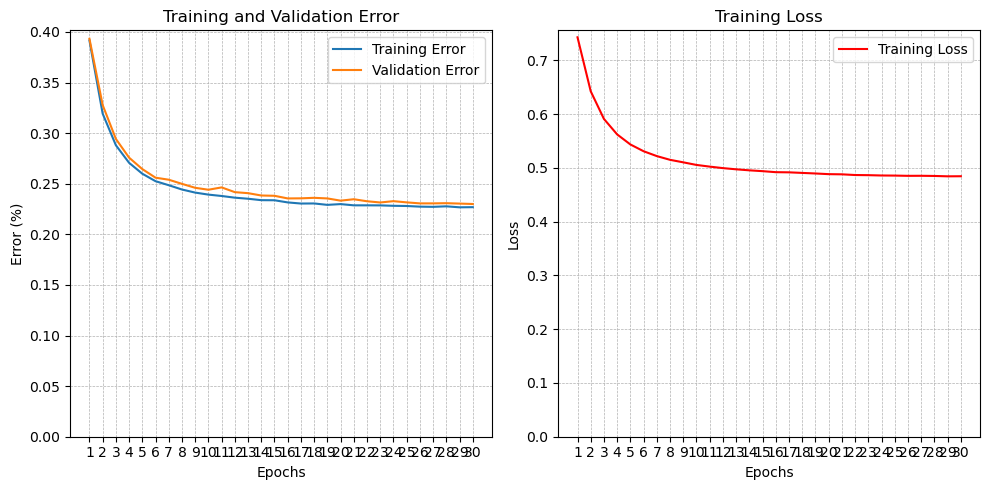



 - binary_feature_extraction_lr-05_batch4_epochs30

Epoch 1; Train err = 34.37; Val err = 33.85; Loss: 0.6494
Epoch 2; Train err = 31.51; Val err = 31.13; Loss: 0.5929
Epoch 3; Train err = 31.99; Val err = 31.02; Loss: 0.5807
Epoch 4; Train err = 30.33; Val err = 29.71; Loss: 0.5756
Epoch 5; Train err = 31.14; Val err = 30.44; Loss: 0.5714
Epoch 10; Train err = 29.93; Val err = 29.64; Loss: 0.5649
Epoch 15; Train err = 29.00; Val err = 28.59; Loss: 0.5624
Epoch 20; Train err = 28.57; Val err = 27.95; Loss: 0.5632
Epoch 25; Train err = 28.00; Val err = 27.97; Loss: 0.5624
Epoch 30; Train err = 29.36; Val err = 29.12; Loss: 0.5631


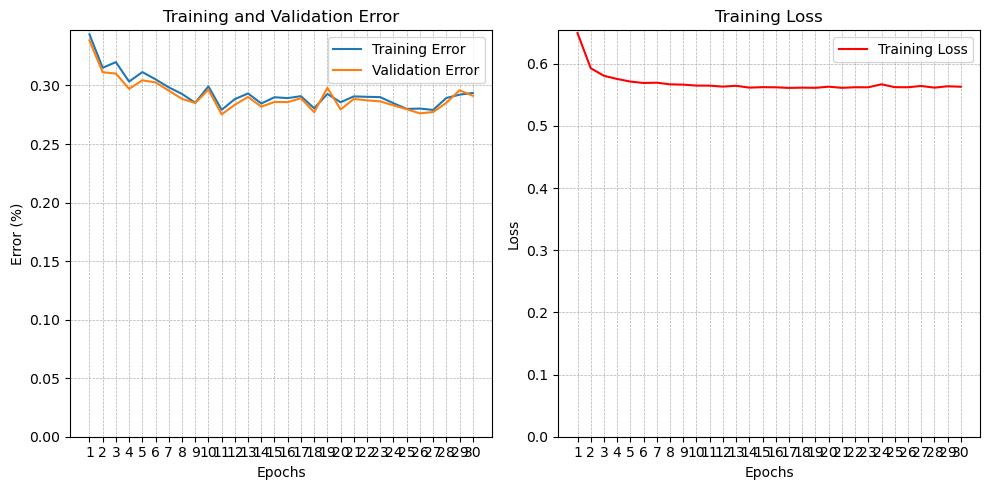



 - binary_feature_extraction_lr-05_batch256_epochs30

Epoch 1; Train err = 45.90; Val err = 45.44; Loss: 0.7646
Epoch 2; Train err = 40.45; Val err = 40.07; Loss: 0.7088
Epoch 3; Train err = 36.67; Val err = 36.59; Loss: 0.6685
Epoch 4; Train err = 33.98; Val err = 33.93; Loss: 0.6383
Epoch 5; Train err = 31.87; Val err = 31.99; Loss: 0.6154
Epoch 10; Train err = 27.19; Val err = 27.01; Loss: 0.5554
Epoch 15; Train err = 25.57; Val err = 25.59; Loss: 0.5298
Epoch 20; Train err = 24.70; Val err = 24.83; Loss: 0.5182
Epoch 25; Train err = 24.23; Val err = 24.38; Loss: 0.5102
Epoch 30; Train err = 23.91; Val err = 23.98; Loss: 0.5037


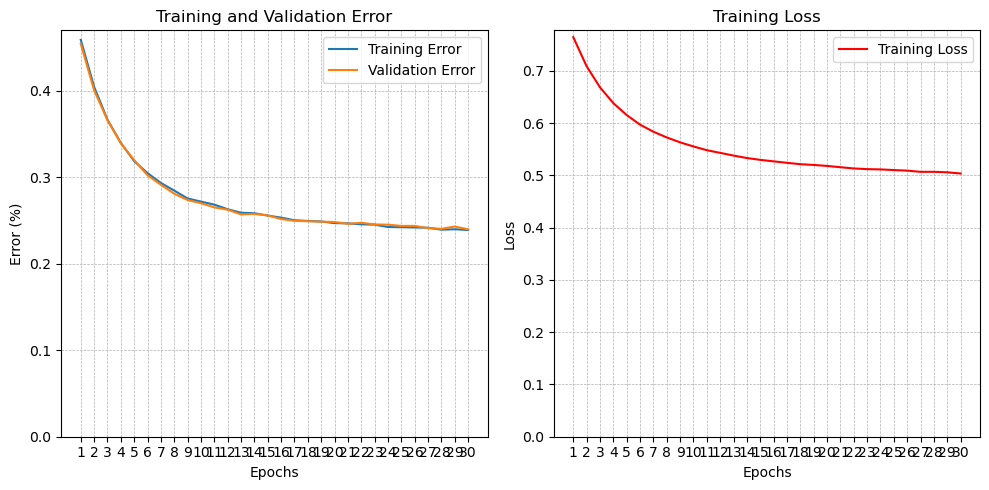



 - binary_feature_extraction_lr-05_batch1024_epochs30

Epoch 1; Train err = 47.06; Val err = 47.11; Loss: 0.8547
Epoch 2; Train err = 46.90; Val err = 47.48; Loss: 0.7685
Epoch 3; Train err = 46.23; Val err = 46.65; Loss: 0.7482
Epoch 4; Train err = 45.29; Val err = 45.93; Loss: 0.7366
Epoch 5; Train err = 44.25; Val err = 44.74; Loss: 0.7266
Epoch 10; Train err = 39.07; Val err = 39.61; Loss: 0.6764
Epoch 15; Train err = 34.79; Val err = 35.77; Loss: 0.6373
Epoch 20; Train err = 31.77; Val err = 32.44; Loss: 0.6073
Epoch 25; Train err = 29.70; Val err = 30.41; Loss: 0.5847
Epoch 30; Train err = 28.22; Val err = 28.98; Loss: 0.5673


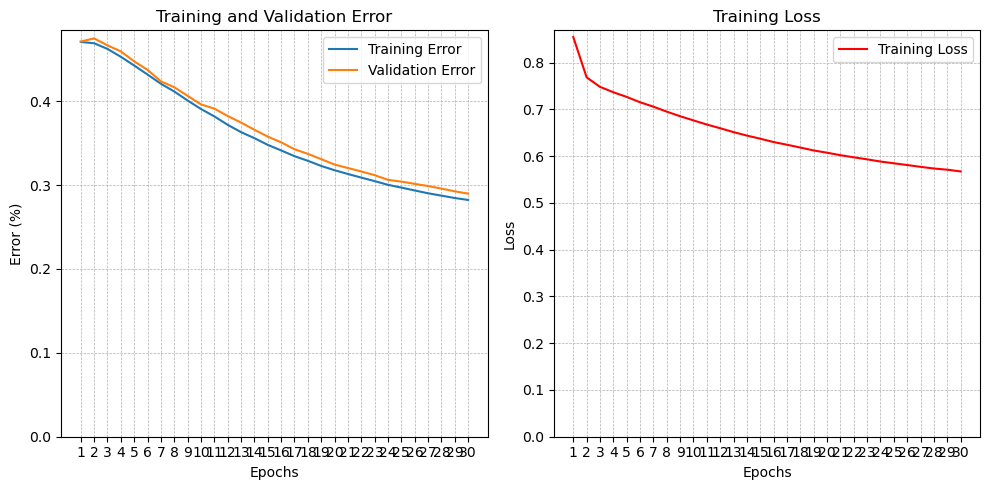

In [7]:
epochs = 30
learning_rates = [0.001, 0.0001, 0.00001]
batch_sizes = [4, 256, 1024]

for lr in learning_rates:
    for batch_size in batch_sizes:
        train_dl = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
        val_dl = DataLoader(validation_ds, batch_size=1000)

        model, opt = binary_feature_extraction(lr)

        print(f"\n\n - binary_feature_extraction_lr{str(lr-int(lr))[2:]}_batch{batch_size}_epochs{epochs}\n")

        train_acc, val_acc, train_loss = cnn_functions.train_network(opt, model, device, epochs, train_dl, val_dl)

        cnn_functions.plot_accuracies(train_acc, val_acc, train_loss)

        torch.save(model.state_dict(), f'./weights/binary_feature_extraction_lr{str(lr-int(lr))[2:]}_batch{batch_size}_epochs{epochs}.pth')

# Feature extraction with one hidden layer

In [8]:
def binary_extraction_hidden(lr):
    # Load the pretrained ResNet18 model
    model = resnet18(weights=ResNet18_Weights.DEFAULT)

    # Freeze all layers in the network
    for param in model.parameters():
        param.requires_grad = False

    # Replace the last fully connected layer
    model.fc = torch.nn.Sequential(
    torch.nn.Linear(512, 64),  # Additional layer
    torch.nn.ReLU(),
    torch.nn.Dropout(0.5),
    torch.nn.Linear(64, 2)  # Output layer
    )

    # Load the model into the GPU
    model = model.to(device)
    # Ensure the optimizer only updates the parameters of the last layer
    optimizer = torch.optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=lr)
    
    return model, optimizer



 - binary_extraction_hidden_lr0001_batch4_epochs30

Epoch 1; Train err = 29.84; Val err = 29.62; Loss: 0.5920
Epoch 2; Train err = 30.45; Val err = 30.41; Loss: 0.5737
Epoch 3; Train err = 28.14; Val err = 28.35; Loss: 0.5679
Epoch 4; Train err = 29.25; Val err = 29.37; Loss: 0.5637
Epoch 5; Train err = 27.87; Val err = 27.91; Loss: 0.5619
Epoch 10; Train err = 27.20; Val err = 27.32; Loss: 0.5536
Epoch 15; Train err = 27.52; Val err = 27.70; Loss: 0.5542
Epoch 20; Train err = 26.74; Val err = 26.66; Loss: 0.5514
Epoch 25; Train err = 26.24; Val err = 26.23; Loss: 0.5507
Epoch 30; Train err = 26.88; Val err = 26.91; Loss: 0.5500


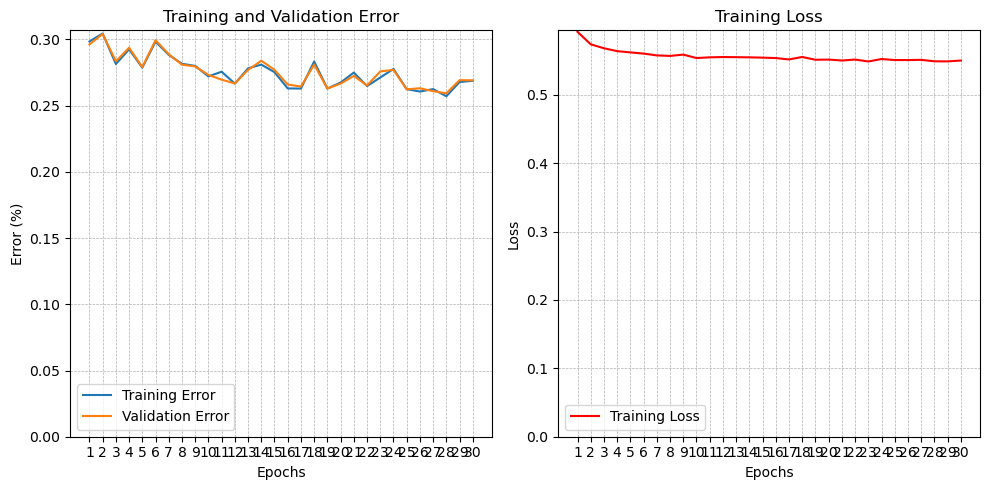



 - binary_extraction_hidden_lr0001_batch256_epochs30

Epoch 1; Train err = 24.50; Val err = 24.85; Loss: 0.5939
Epoch 2; Train err = 23.24; Val err = 23.41; Loss: 0.5186
Epoch 3; Train err = 22.54; Val err = 23.32; Loss: 0.5007
Epoch 4; Train err = 22.07; Val err = 22.49; Loss: 0.4900
Epoch 5; Train err = 21.57; Val err = 21.93; Loss: 0.4837
Epoch 10; Train err = 20.03; Val err = 21.20; Loss: 0.4613
Epoch 15; Train err = 19.01; Val err = 20.46; Loss: 0.4474
Epoch 20; Train err = 18.35; Val err = 20.20; Loss: 0.4373
Epoch 25; Train err = 17.70; Val err = 19.75; Loss: 0.4297
Epoch 30; Train err = 17.24; Val err = 19.50; Loss: 0.4257


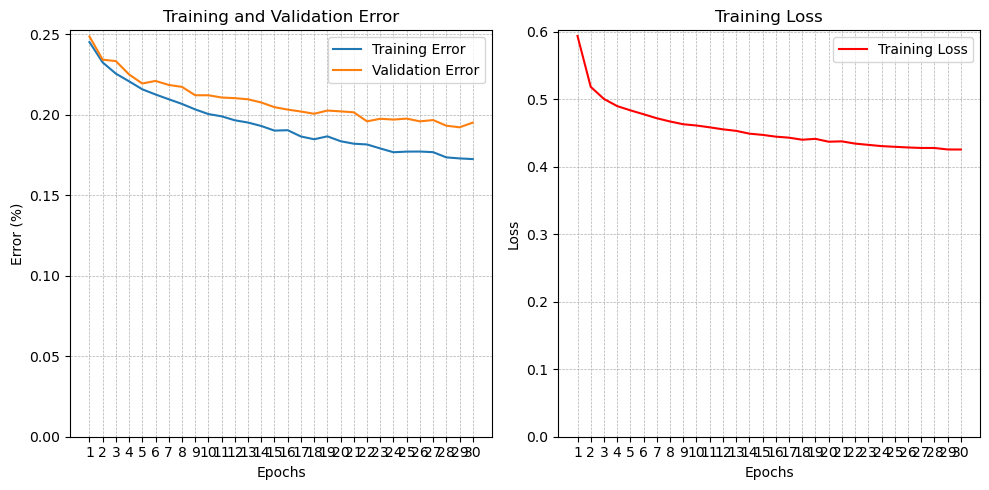



 - binary_extraction_hidden_lr-05_batch4_epochs30

Epoch 1; Train err = 30.67; Val err = 30.88; Loss: 0.6360
Epoch 2; Train err = 30.64; Val err = 30.28; Loss: 0.5945
Epoch 3; Train err = 30.45; Val err = 29.83; Loss: 0.5828
Epoch 4; Train err = 28.85; Val err = 28.28; Loss: 0.5776
Epoch 5; Train err = 28.47; Val err = 28.96; Loss: 0.5727
Epoch 10; Train err = 27.27; Val err = 27.07; Loss: 0.5643
Epoch 15; Train err = 29.01; Val err = 28.81; Loss: 0.5605
Epoch 20; Train err = 28.25; Val err = 28.20; Loss: 0.5564
Epoch 25; Train err = 27.49; Val err = 27.72; Loss: 0.5555
Epoch 30; Train err = 26.19; Val err = 26.64; Loss: 0.5544


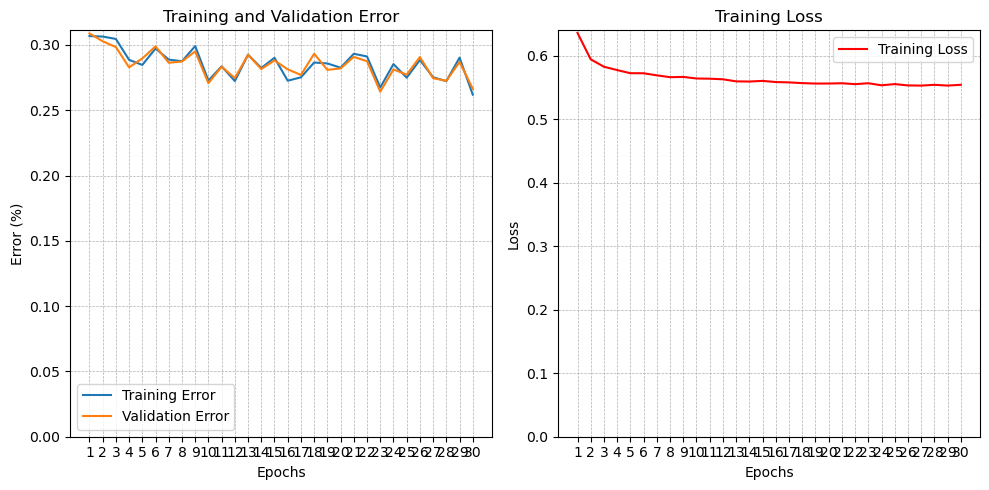



 - binary_extraction_hidden_lr-05_batch256_epochs30

Epoch 1; Train err = 34.69; Val err = 35.24; Loss: 0.6973
Epoch 2; Train err = 29.65; Val err = 30.35; Loss: 0.6477
Epoch 3; Train err = 27.67; Val err = 28.27; Loss: 0.6188
Epoch 4; Train err = 26.44; Val err = 26.99; Loss: 0.5973
Epoch 5; Train err = 25.73; Val err = 26.37; Loss: 0.5803
Epoch 10; Train err = 24.35; Val err = 24.90; Loss: 0.5361
Epoch 15; Train err = 23.51; Val err = 23.88; Loss: 0.5203
Epoch 20; Train err = 23.12; Val err = 23.61; Loss: 0.5094
Epoch 25; Train err = 22.74; Val err = 23.13; Loss: 0.4998
Epoch 30; Train err = 22.50; Val err = 22.98; Loss: 0.4948


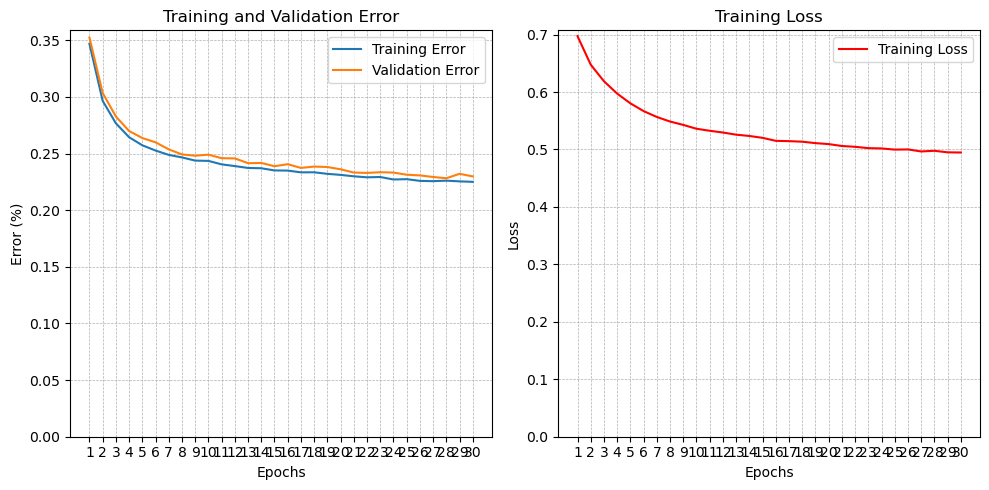

In [9]:
epochs = 30
learning_rates = [0.0001, 0.00001]
batch_sizes = [4, 256]

for lr in learning_rates:
    for batch_size in batch_sizes:
        train_dl = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
        val_dl = DataLoader(validation_ds, batch_size=1000)

        model, opt = binary_extraction_hidden(lr)

        print(f"\n\n - binary_extraction_hidden_lr{str(lr-int(lr))[2:]}_batch{batch_size}_epochs{epochs}\n")

        train_acc, val_acc, train_loss = cnn_functions.train_network(opt, model, device, epochs, train_dl, val_dl)

        cnn_functions.plot_accuracies(train_acc, val_acc, train_loss)

        torch.save(model.state_dict(), f'./weights/binary_extraction_hidden_lr{str(lr-int(lr))[2:]}_batch{batch_size}_epochs{epochs}.pth')

# Fine tuning

In [4]:
def binary_finetuning(lr):
    # Load the pretrained ResNet18 model
    model = resnet18(weights=ResNet18_Weights.DEFAULT)

    # Replace the last fully connected layer
    model.fc = torch.nn.Linear(512, 2)

    # Load the model into the GPU
    model = model.to(device)
    # Ensure the optimizer only updates the parameters of the last layer
    optimizer = torch.optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=lr)
    
    return model, optimizer



 - binary_finetuning_lr0001_batch4_epochs30

Epoch 1; Train err = 22.48; Val err = 23.67; Loss: 0.4168
Epoch 2; Train err = 13.50; Val err = 14.38; Loss: 0.3013
Epoch 3; Train err = 12.82; Val err = 12.72; Loss: 0.2590
Epoch 4; Train err = 11.91; Val err = 12.55; Loss: 0.2273
Epoch 5; Train err = 9.67; Val err = 10.41; Loss: 0.2002
Epoch 10; Train err = 9.99; Val err = 11.13; Loss: 0.1464
Epoch 15; Train err = 8.98; Val err = 10.82; Loss: 0.0982
Epoch 20; Train err = 5.42; Val err = 8.15; Loss: 0.0746
Epoch 25; Train err = 10.27; Val err = 12.50; Loss: 0.0510
Epoch 30; Train err = 4.49; Val err = 8.02; Loss: 0.0433


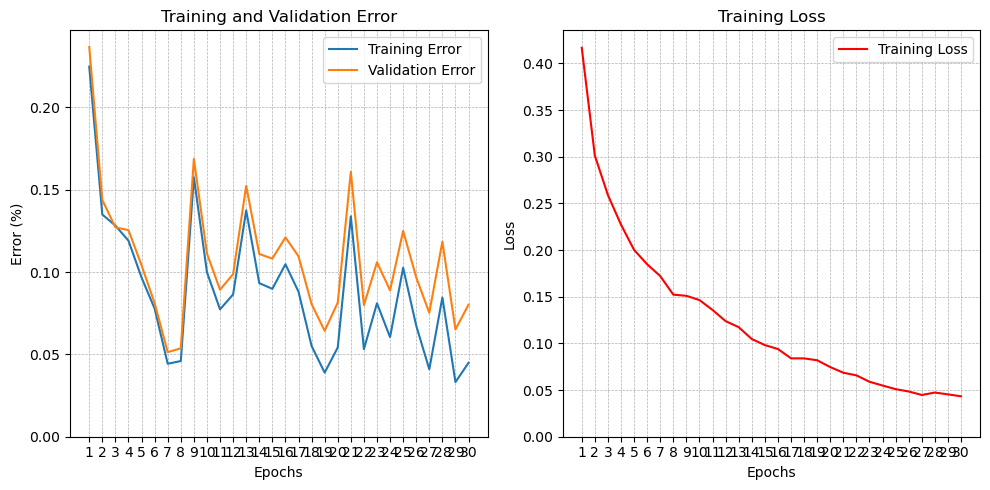



 - binary_finetuning_lr0001_batch256_epochs30

Epoch 1; Train err = 2.72; Val err = 4.85; Loss: 0.1960
Epoch 2; Train err = 0.98; Val err = 3.72; Loss: 0.0789
Epoch 3; Train err = 0.60; Val err = 3.60; Loss: 0.0413
Epoch 4; Train err = 0.50; Val err = 3.83; Loss: 0.0268
Epoch 5; Train err = 0.39; Val err = 3.70; Loss: 0.0212
Epoch 10; Train err = 0.19; Val err = 3.43; Loss: 0.0126
Epoch 15; Train err = 0.18; Val err = 3.39; Loss: 0.0073
Epoch 20; Train err = 0.10; Val err = 3.02; Loss: 0.0068
Epoch 25; Train err = 0.12; Val err = 3.01; Loss: 0.0058
Epoch 30; Train err = 0.14; Val err = 3.22; Loss: 0.0050


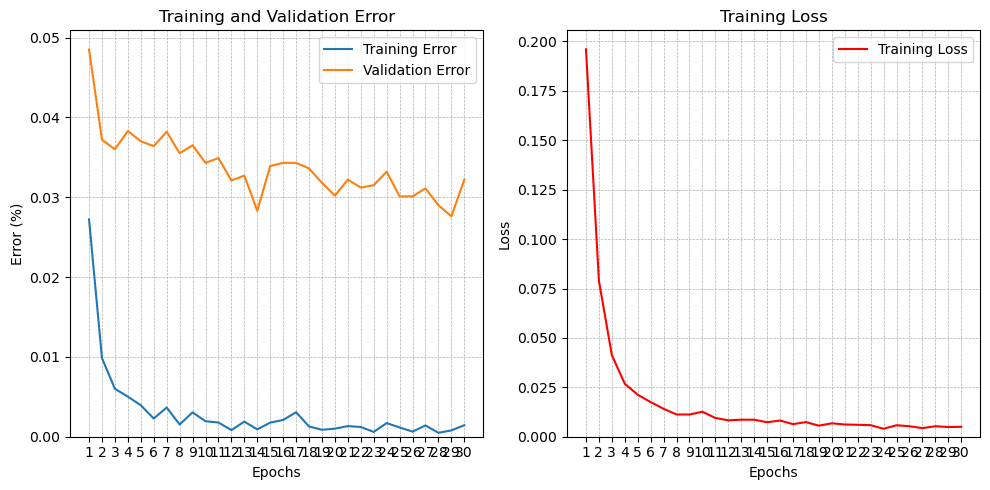



 - binary_finetuning_lr-05_batch4_epochs30

Epoch 1; Train err = 15.76; Val err = 15.66; Loss: 0.4872
Epoch 2; Train err = 12.88; Val err = 12.93; Loss: 0.4205
Epoch 3; Train err = 11.03; Val err = 11.40; Loss: 0.3827
Epoch 4; Train err = 8.48; Val err = 8.86; Loss: 0.3615
Epoch 5; Train err = 7.45; Val err = 7.85; Loss: 0.3408
Epoch 10; Train err = 3.99; Val err = 4.61; Loss: 0.2409
Epoch 15; Train err = 11.16; Val err = 12.76; Loss: 0.1310
Epoch 20; Train err = 5.62; Val err = 7.52; Loss: 0.0905
Epoch 25; Train err = 6.43; Val err = 8.67; Loss: 0.0629
Epoch 30; Train err = 2.82; Val err = 5.80; Loss: 0.0447


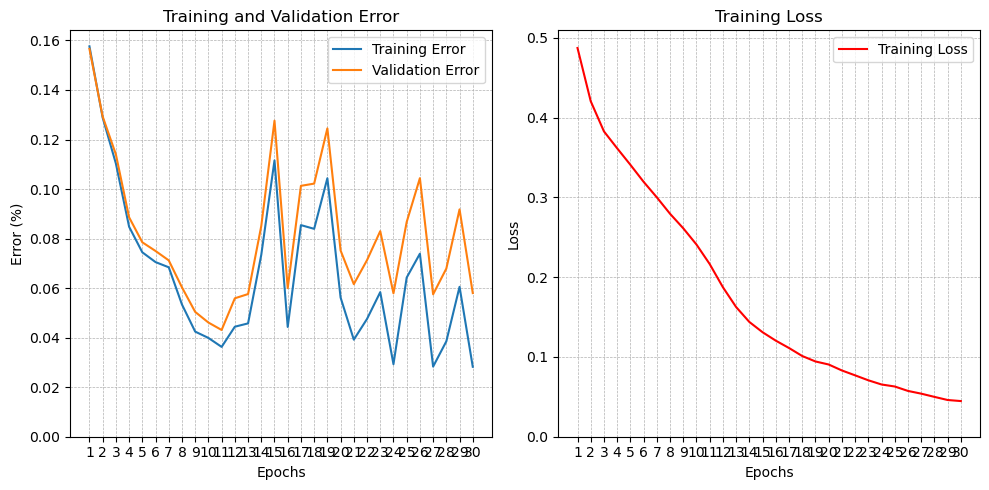



 - binary_finetuning_lr-05_batch256_epochs30

Epoch 1; Train err = 10.34; Val err = 11.90; Loss: 0.4291
Epoch 2; Train err = 6.23; Val err = 8.38; Loss: 0.2210
Epoch 3; Train err = 4.42; Val err = 7.13; Loss: 0.1591
Epoch 4; Train err = 3.12; Val err = 6.22; Loss: 0.1244
Epoch 5; Train err = 2.20; Val err = 5.92; Loss: 0.0995
Epoch 10; Train err = 0.18; Val err = 5.28; Loss: 0.0275
Epoch 15; Train err = 0.01; Val err = 5.25; Loss: 0.0072
Epoch 20; Train err = 0.00; Val err = 5.12; Loss: 0.0032
Epoch 25; Train err = 0.00; Val err = 5.05; Loss: 0.0023
Epoch 30; Train err = 0.00; Val err = 4.95; Loss: 0.0019


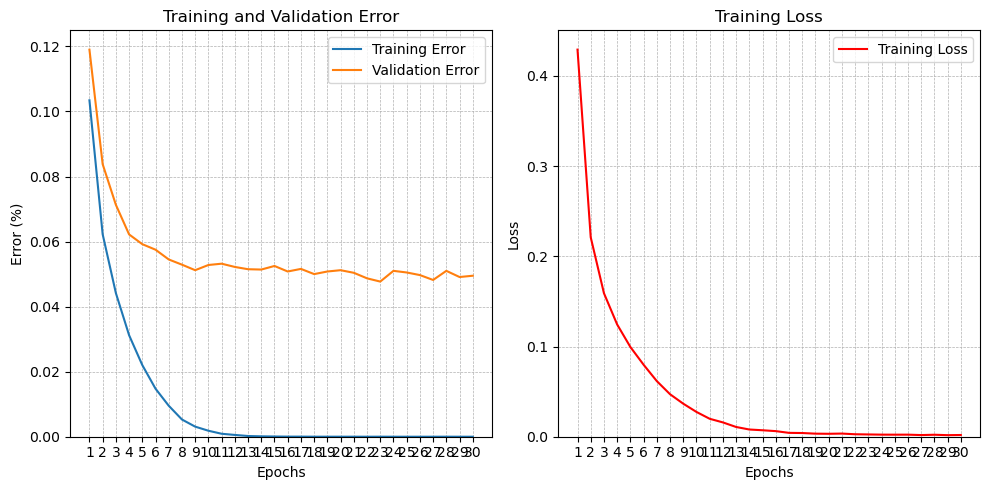

In [6]:
epochs = 30
learning_rates = [0.0001, 0.00001]
batch_sizes = [4, 256]

for lr in learning_rates:
    for batch_size in batch_sizes:
        train_dl = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
        val_dl = DataLoader(validation_ds, batch_size=1000)

        model, opt = binary_finetuning(lr)

        print(f"\n\n - binary_finetuning_lr{str(lr-int(lr))[2:]}_batch{batch_size}_epochs{epochs}\n")

        train_acc, val_acc, train_loss = cnn_functions.train_network(opt, model, device, epochs, train_dl, val_dl)

        cnn_functions.plot_accuracies(train_acc, val_acc, train_loss)

        torch.save(model.state_dict(), f'./weights/binary_finetuning_lr{str(lr)[2:]}_batch{batch_size}_epochs{epochs}.pth')

# Confusion Matrix

Test accuracy: 81.84%


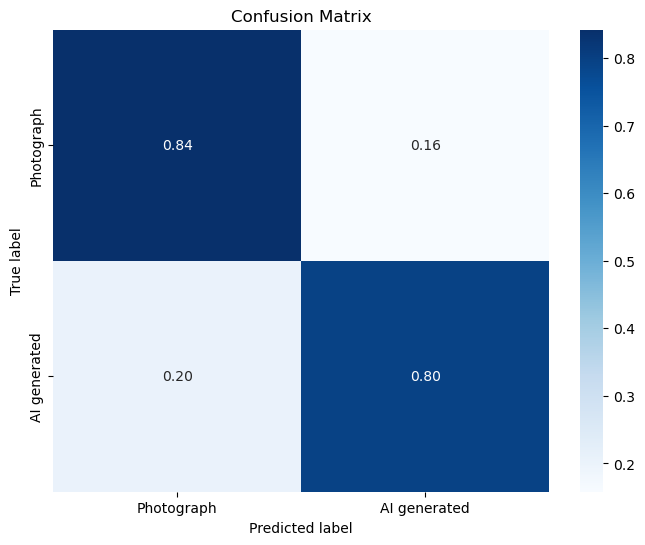

In [23]:
test_loader = DataLoader(validation_ds, batch_size=1000, shuffle=True)

model, _ = binary_extraction_hidden(1)
model.load_state_dict(torch.load('./weights/binary_extraction_hidden_lr0001_batch128_epochs80.pth'))
model.eval() 
device = next(model.parameters()).device

total_correct = 0
total_images = 0
confusion_matrix = torch.zeros(2, 2)  

with torch.no_grad():  
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = model(inputs)
        
        _, predicted = torch.max(outputs, 1)
        total_images += labels.size(0)
        total_correct += (predicted == labels).sum().item()

        for label, prediction in zip(labels.view(-1), predicted.view(-1)):
            confusion_matrix[label.long(), prediction.long()] += 1

accuracy = total_correct / total_images
test_error = 1 - accuracy

print(f'Test accuracy: {accuracy*100:.2f}%')

confusion_matrix_np = confusion_matrix.numpy()

def plot_confusion_matrix(cm, class_names):
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

class_names = ['Photograph', 'AI generated']  
plot_confusion_matrix(confusion_matrix_np, class_names)

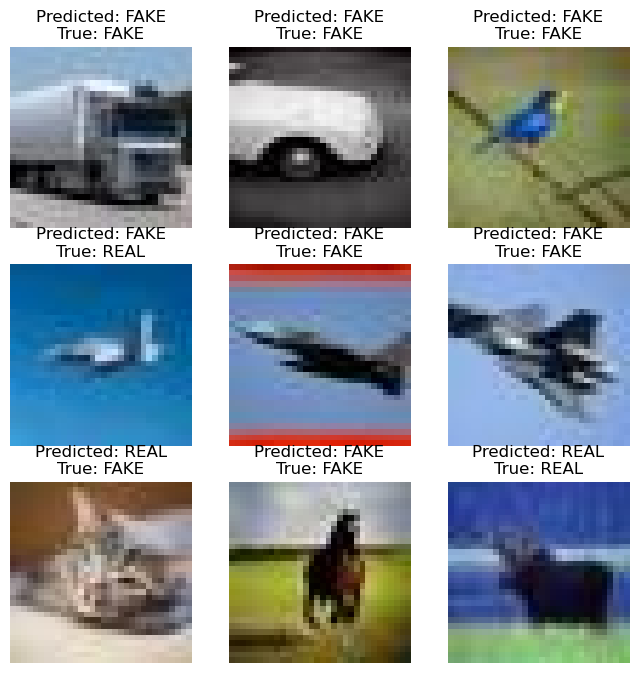

In [22]:
model.eval()  

figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_ds), size=(1,)).item()
    img, true_label = train_ds[sample_idx]
    img_tensor = img.unsqueeze(0)  # Add batch dimension

    # Move to the same device as the model
    img_tensor = img_tensor.to(next(model.parameters()).device)

    with torch.no_grad():  # 
        logits = model(img_tensor)
        predicted_label = torch.argmax(logits, dim=1).item()

    img = img.cpu().numpy().transpose((1, 2, 0))  # Adjust for matplotlib (H, W, C)

    figure.add_subplot(rows, cols, i)
    plt.title(f'Predicted: {labels_map[predicted_label]}\nTrue: {labels_map[true_label]}')
    plt.axis("off")
    plt.imshow(img)
plt.show()
